In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
car_evaluation = pd.read_csv("car_evaluation.csv")
wine = pd.read_csv("wine.csv")

In [4]:
car_evaluation.head()

,buying,maintenance,doors,persons,lug_boot,safety,label
0,4,4,2,2,1,1,0
1,4,4,2,2,1,2,0
2,4,4,2,2,1,3,0
3,4,4,2,2,2,1,0
4,4,4,2,2,2,2,0


In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1) Kernel functions are the functions that map one space to a higher dimensional space. This question demon-
strates the primary use of kernel functions in SVM. Consider four points: A = (1, 1), B = (2, 2), C = (2, 1),
D = (1, 2) and two labels red, blue. Suppose A, B belong to the label red and C, D belong to the label blue.

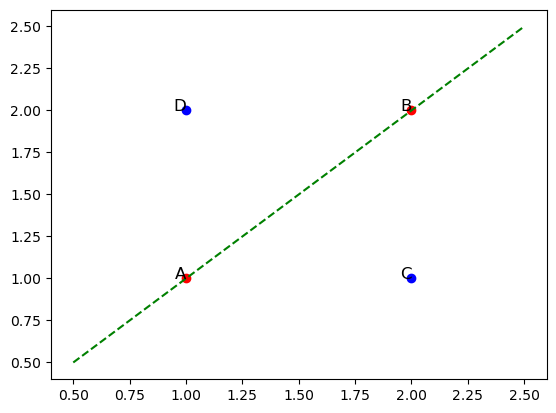

In [6]:
# 1a) Are labels red and blue linearly separable? Explain your reasoning in words with visualization

A = (1, 1)
B = (2, 2)
C = (2, 1)
D = (1, 2)

red_points = [A, B]
blue_points = [C, D]

red_x = [point[0] for point in red_points]
red_y = [point[1] for point in red_points]

blue_x = [point[0] for point in blue_points]
blue_y = [point[1] for point in blue_points]

# Plot the points
plt.scatter(red_x, red_y, color="red", label="Red Points (A, B)")
plt.scatter(blue_x, blue_y, color="blue", label="Blue Points (C, D)")

# Add labels for the points
for point, label in zip([A, B, C, D], ["A", "B", "C", "D"]):
    plt.text(point[0], point[1], label, fontsize=12, ha="right")
    
# Plot a line to show linear separability (y = x)
x_line = [0.5, 2.5]
y_line = [0.5, 2.5]
plt.plot(x_line, y_line, color='green', linestyle='--', label='Separator Line (y = x)')

Since the red points are on the line $y = x$ and the bed points are symmetric to the line $y = x$, this means that these labels are not linearly separable. Since they are symmetrically arranged, no single straight line can separate these to get 100% accuracy with respect to both labels. Additionally, it can be shown that points C and D are on symmetrically opposite sides of line AB, which means that for any line that separates either C or D from the red points, the other will be put on the wrong side.

1b) Consider the kernel function: ϕ(x) = (x1/x2 , |x1 − x2|, x1 + x2) where x = (x1, x2). We can observe that this kernel function maps 2-dimensional space to 3-dimensional space. What are the points A, B, C, D after transformation?

A = ϕ(1, 1) = (1, 0, 2)

B = ϕ(2, 2) = (1, 0, 4)

C = ϕ(2, 1) = (2, 1, 3)

D = ϕ(1, 2) = (0.5, 1, 3)

1c) Are labels red and blue linearly separable after the transformation? Explain your reasoning.

After the kernel transformation, the labels red and blue are linearly separable. This can be seen easily, as when we group them by their label, we can notice that each label has something unique to it. For instance, label red (A and B) both have y = 0, while label blue (C and D) have y = 1. This leads us to conclude that a line in between 0 and 1 (i.e. y = 0.5) could be a line that could linearly separate the two labels. 

2) Naive Bayes

2a) Suppose we have a large training set with 100,000 samples. There are 3 different classes and 4 different features in the training set. Each distinct features can take 5 different values. How many parameters do we need to estimate, if we don’t make the naive Bayes assumption? How many parameters do we need to estimate, if we make the naive Bayes assumption?

Without the Naive Bayes assumption, we cannot assume conditional independence between features and values. This means that for each feature, we need to estimate the joint probability for each class, such that we can estimate P(feature1, feature2, feature3, feature4 | Class):

* This means that since we have 4 different features, each with 5 different values, this results in (5 x 5 x 5 x 5) = 625. For 625 combinations, we need 624 parameters, since probabilities can sum up to 1. Additionally, we need to multiply this by 3, in order to account for all classes that need to be predicted.
* Additionally, to estimate the probability of each class, we need 2 parameters (probabilities add to 1).
* Finally, we have (624 * 3) + 2 = 1874 total parameters 

With the Naive Bayes assumption, we need to consider 2 main components:

* Class Probabilities: P(Class) for each class: There are 2 parameters needed for this (due to probabilities adding to 1)
* P(Feature|Class) for each feature-value given each class: P(feature1, feature2, feature3, feature4 | Class) = P(feature1 | Class) * P(feature2 | Class) * P(feature3 | Class) * P(feature4 | Class). This means we only need to predict P(feature|class) for all features and all classes. This results in us having 4 features, 5 different values, and 3 different classes. However, for each value in each distinct feature, we only need 4, because probabilities sum up to 1, meaning we will need (4 x 4 x 3) = 48 parameters.
* Finally, this means we have (2 + 48) = 50 total parameters with the Naive Bayes assumption

In [8]:
from sklearn.model_selection import train_test_split

X, y = (
    car_evaluation.drop(columns=["label"]),
    car_evaluation[["label"]]
)
# split into train & test (0.8, 0.2)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
X_test

,buying,maintenance,doors,persons,lug_boot,safety
599,3,3,4,2,2,3
1201,2,1,2,4,2,2
628,3,3,5,2,3,2
1498,1,3,5,4,2,2
1263,2,1,4,5,2,1
...,...,...,...,...,...,...
100,4,4,5,5,1,2
274,4,2,4,2,2,2
1206,2,1,2,5,1,1
101,4,4,5,5,1,3


In [10]:
# 2b) Shuffle the data with random seed 42, and split it into training, validation, and test splits, with a 60/20/20% ratio(e.g., use random_state in sklearn.model_selection.train_test_split). Train a Naive-Bayes classifier (e.g., sklearn.naive_bayes.GaussianNB) on the car-evaluation dataset using all the features and report the training/validation/test accuracy
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X, y = (
    car_evaluation.drop(columns=["label"]),
    car_evaluation['label']
)

# split into train & test (0.8, 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# split into train and val (0.6, 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

model = GaussianNB()
model.fit(X_train, y_train)

# training accuracy
training_pred = model.predict(X_train)
print(f"Training Accuracy: {(training_pred == y_train).mean()}")

# val accuracy
val_pred = model.predict(X_val)
print(f"Validation Accuracy: {(val_pred == y_val).mean()}")

# test accuracy
test_pred = model.predict(X_test)
print(f"Test Accuracy: {(test_pred == y_test).mean()}")

Training Accuracy: 0.777027027027027
Validation Accuracy: 0.7630057803468208
Test Accuracy: 0.7543352601156069


3) SVM (20 points): In this question, we will be using the Car Evaluation dataset (car evaluation.csv). The target variable is the “label ” and all the rest are features

In [11]:
# 3a) Shuffle the data with random seed 42, and split it into training, validation, and test splits, with a 60/20/20% ratio(e.g., use random_state in sklearn.model_selection.train_test_split). Train a SVM classifier (e.g., sklearn.svm.SVC) with regularization parameter C = 1.0 on the car-evaluation dataset using all the features and report the training/validation/test accuracy
from sklearn.svm import SVC

X, y = (car_evaluation.drop(columns=["label"]), car_evaluation["label"])

# split into train & test (0.8, 0.2)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# split into train and val (0.6, 0.2)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42
)

model = SVC(C = 1.0)
model.fit(X_train, y_train)

# training accuracy
training_pred = model.predict(X_train)
print(f"Training Accuracy: {(training_pred == y_train).mean()}")

# val accuracy
val_pred = model.predict(X_val)
print(f"Validation Accuracy: {(val_pred == y_val).mean()}")

# test accuracy
test_pred = model.predict(X_test)
print(f"Test Accuracy: {(test_pred == y_test).mean()}")

Training Accuracy: 0.9584942084942085
Validation Accuracy: 0.9653179190751445
Test Accuracy: 0.9450867052023122


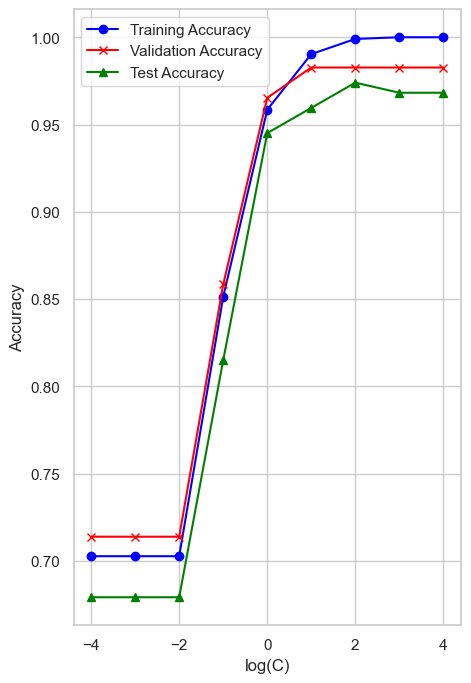

In [12]:
# 3b) Consider values of C in the range {10−4, 10−3, ..., 103, 104}. Report (or plot) the train, validation, and test accuracy for each value of C. Based on these values, which classifier would you select (in terms of generalization performance) and why?
import seaborn as sns

C_values = [10**x for x in range(-4, 5)]

train_acc, val_acc, test_acc = [], [], []
for C in C_values:
    model = SVC(C = C)
    model.fit(X_train, y_train)

    # training accuracy
    training_pred = model.predict(X_train)
    train_acc.append((training_pred == y_train).mean())

    # val accuracy
    val_pred = model.predict(X_val)
    val_acc.append((val_pred == y_val).mean())

    # test accuracy
    test_pred = model.predict(X_test)
    test_acc.append((test_pred == y_test).mean())

C_values_log = np.log10(C_values)
sns.set(style = "whitegrid")
plt.figure(figsize = (5, 8))
plt.plot(C_values_log, train_acc, label = "Training Accuracy", color = "blue", marker = 'o')
plt.plot(C_values_log, val_acc, label = "Validation Accuracy", color = "red", marker = 'x')
plt.plot(C_values_log, test_acc, label = "Test Accuracy", color = "green", marker = '^')
plt.xlabel("log(C)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

In this case, the classifier I would choose would be the SVM classifier with a C value of $10^2$, or 100, because it had the highest testing accuracy while maintaining the peak validation accuracy. This, combined with a training accuracy of 100%, led it to be the best metric to be used within the SVM model, where the testing accuracy reached over 97% and the validation accuracy reached over 98%.

4) Decision Tree and Random Forest (20 points): In this question, we will be predicting wine quality for the Wine dataset. (’Wine.csv’ in Canvas). Use Macro average technique to compute precision, recall, f1-score and if not mentioned otherwise

Training Accuracy: 1.0
Test Accuracy: 0.5604166666666667


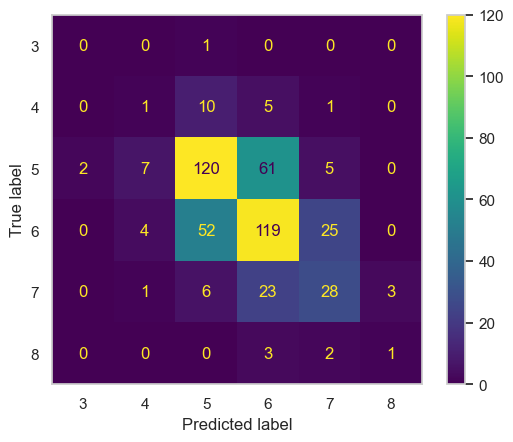

Class 0 - Precision: 0.00, Recall: 0.00, F1-score: 0.00
Class 1 - Precision: 0.08, Recall: 0.06, F1-score: 0.07
Class 2 - Precision: 0.63, Recall: 0.62, F1-score: 0.62
Class 3 - Precision: 0.56, Recall: 0.59, F1-score: 0.58
Class 4 - Precision: 0.46, Recall: 0.46, F1-score: 0.46
Class 5 - Precision: 0.25, Recall: 0.17, F1-score: 0.20

Macro Average - Precision: 0.33, Recall: 0.32, F1-score: 0.32


In [13]:
# 4a) Shuffle the data with random seed 42, and split it into training and test sets, with 70/30 ratio. Train a Decision Tree classifier (e.g., sklearn.tree.DecisionTreeClassifier) on the training set only and report the confusion matrix on the test set using the trained model. Report the precision, recall and f1 score using the confusion matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

X, y = wine.drop(columns = ['quality']), wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# training accuracy
training_pred = model.predict(X_train)
print(f"Training Accuracy: {(training_pred == y_train).mean()}")

# test accuracy
test_pred = model.predict(X_test)
print(f"Test Accuracy: {(test_pred == y_test).mean()}")

labels = sorted(y.unique())
cm = confusion_matrix(y_test, test_pred, labels = labels)
disp = ConfusionMatrixDisplay(cm, display_labels = labels)
disp.plot()
plt.grid(False)
plt.show()

precision = []
recall = []
f1_score = []

for i in range(cm.shape[0]):
    TP = cm[i, i] 
    FP = np.sum(cm[:, i]) - TP  
    FN = np.sum(cm[i, :]) - TP

    p = TP / (TP + FP) if TP + FP > 0 else 0  
    r = TP / (TP + FN) if TP + FN > 0 else 0  
    f1 = 2 * (p * r) / (p + r) if p + r > 0 else 0  

    precision.append(p)
    recall.append(r)
    f1_score.append(f1)

# Display per-class metrics
for i in range(cm.shape[0]):
    print(
        f"Class {i} - Precision: {precision[i]:.2f}, Recall: {recall[i]:.2f}, F1-score: {f1_score[i]:.2f}"
    )

# Average metrics (Macro Average)
avg_precision = np.mean(precision)
avg_recall = np.mean(recall)
avg_f1_score = np.mean(f1_score)

print(
    f"\nMacro Average - Precision: {avg_precision:.2f}, Recall: {avg_recall:.2f}, F1-score: {avg_f1_score:.2f}"
)

Training Accuracy: 1.0
Test Accuracy: 0.6833333333333333


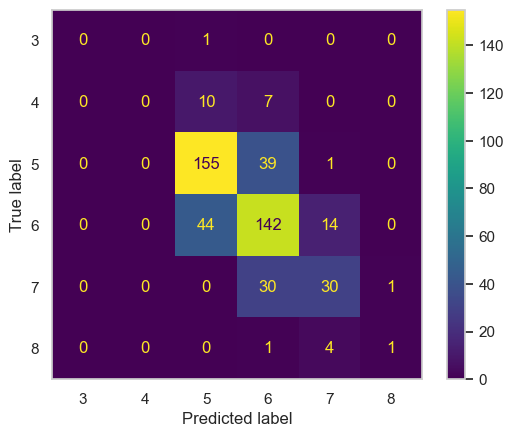

Class 0 - Precision: 0.00, Recall: 0.00, F1-score: 0.00
Class 1 - Precision: 0.00, Recall: 0.00, F1-score: 0.00
Class 2 - Precision: 0.74, Recall: 0.79, F1-score: 0.77
Class 3 - Precision: 0.65, Recall: 0.71, F1-score: 0.68
Class 4 - Precision: 0.61, Recall: 0.49, F1-score: 0.55
Class 5 - Precision: 0.50, Recall: 0.17, F1-score: 0.25

Macro Average - Precision: 0.42, Recall: 0.36, F1-score: 0.37


In [14]:
# 4b) (b) Using the same data and split, train a Random Forest classifier (e.g., sklearn.ensemble.RandomForestClassifier) on the training set only and report the confusion matrix on the test set using the trained model. Report the precision, recall and f1 score using the confusion matrix. Explain why Random Forest algorithm performs better than Decision Tree algorithm.
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

# training accuracy
training_pred = model.predict(X_train)
print(f"Training Accuracy: {(training_pred == y_train).mean()}")

# test accuracy
test_pred = model.predict(X_test)
print(f"Test Accuracy: {(test_pred == y_test).mean()}")

labels = sorted(y.unique())
cm = confusion_matrix(y_test, test_pred, labels=labels)
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot()
plt.grid(False)
plt.show()

precision = []
recall = []
f1_score = []

for i in range(cm.shape[0]):
    TP = cm[i, i]
    FP = np.sum(cm[:, i]) - TP
    FN = np.sum(cm[i, :]) - TP

    p = TP / (TP + FP) if TP + FP > 0 else 0 
    r = TP / (TP + FN) if TP + FN > 0 else 0
    f1 = 2 * (p * r) / (p + r) if p + r > 0 else 0 

    precision.append(p)
    recall.append(r)
    f1_score.append(f1)

for i in range(cm.shape[0]):
    print(
        f"Class {i} - Precision: {precision[i]:.2f}, Recall: {recall[i]:.2f}, F1-score: {f1_score[i]:.2f}"
    )

avg_precision = np.mean(precision)
avg_recall = np.mean(recall)
avg_f1_score = np.mean(f1_score)

print(
    f"\nMacro Average - Precision: {avg_precision:.2f}, Recall: {avg_recall:.2f}, F1-score: {avg_f1_score:.2f}"
)

In this case, Random Forest performs better than Decision Tree because there is reduced variance, reduced overfitting, and the fact that random forest tends to collect features that are random which inherently reduces bias. In this case, one thing that can be noticed is that the Random Forest is better at accurately predicting the true labels of 5 and 6 (which are most common within the dataset) compared to the DecisionTree. For instance, when the true label of a wine is 5 or 6, the Random Forest predicts it 149/195 = 76.4% and 137/200 = 68.5% of the time correctly, compared to Decision Tree's 122/195 = 62.6% and 114/200 = 57% for the same labels, which greatly influences their preicision, recall, f1-score, and accuracy.

4c) Suppose we have a dataset with 1000 negative samples and 10 positive samples, and a model was trained based on this dataset. Explain what could happen and why precision and recall would be a better evaluation metrics than accuracy in this case.

For a dataset with 1000 negative samples and only 10 positive samples, it's important to realize that precision and recall are better than accuracy. In particular, with accuracy, it can be easy to get a very high accuracy but actually end up with unimportant results. For instance, let's say we trained a model that generalized everything to negative. If our training set had 100 negative samples and only 1 positive sample, it would be correct 100/101 = 99.1% of the time, which is normally great! However, if we want to place importance onto getting the positive samples correct, than this sucks, because it will predict the positive sample incorrectly. In this case, precision and recall would be better metrics to use, because we could more accurately see how well the model generalized for each label, rather than for a dataset as a whole.

5) Bias vs Variance

5a) State briefly what you understand by the bias-variance tradeoff.

From my understanding of the bias variance tradeoff, it's a tradeoff that exemplifies and explains a lot of the complexity that a model may have. For instance, the bias term of a model refers to errors that are introduced by simplifying a model, usually by introducing something like regularization. When there is a high bias in a model, a model is typically too simple and can't capture patterns within the data. On the other hand, the variance of a model refers to errors that can come from overfitting, or having a model that is too complex without enough regularization. This captures unintended noise from experiments and can make bad predictions. Typically, when there is a high bias, there is lower variance, and vice versa, meaning we need to find a balance between bias and variance in order to create a model that is neither too simple nor too complex.

5b) What happens to the bias and variance when the number of training samples increases?

As the number of training samples increase, bias typically decreases or remains roughly the same because models are typically better at generalizing as they get more and more data. This means there is less risk of underfitting since the model can capture more complex relationships. Similarly, variance will normally also decrease, beacuse more and more data will allow a model to stabilize it's predictions and become less sensitive to individual training examples, which may have introduced noise before.

5c) Suppose you decide to use the k-Nearest Neighbors (KNN) classifier for a classification problem. In this problem, assume that you are given a fixed number of training samples. You can choose either 1 or 100 as your value of k, the number of neighbors to be considered for classification. Which k would give you higher variance? Which k would give you higher bias? Explain.

The k that would give you the higher variance would be when k = 1. This is because the model would typically overfit when k = 1, beacuse k = 1 introduces a lot of errors, especially when there are points that have noise. This would lead to overfitting, as the model would be subject to all this unnecessary noise and become hyperspecific. The k that would give a higher bias would be when k = 100, because our model would be simplified, where individual points would have overall less influence. The decision boundary of this model would be very smooth, with predictions being averaged over many neighbors, however, there is a chance that the model misses patterns by averaging too much, leading it to having a higher bias. 